In [43]:
#importing the below packages and reading the 5000x10000 matrix 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from matplotlib.colors import ListedColormap
from matplotlib.colors import BoundaryNorm
from sklearn.decomposition import TruncatedSVD
from scipy.linalg import svd
#data is read from the location on the desktop with space seperator and without header
sample = pd.read_csv("C://Users//home//Downloads//dense_matrix_5000.csv",sep =' ',header=None)

In [4]:
#display the data stored in the firt five rows of data  
sample.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#display rows,columns,data type,memory information of data
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 10000 entries, 0 to 9999
dtypes: int64(10000)
memory usage: 381.5 MB


In [26]:
def plot_matrix(matr):
    cmap = ListedColormap(['white','red','green'])
    norm = BoundaryNorm([-10,0.99,2.00000001,100],cmap.N)
    plt.matshow(matr,cmap = cmap,norm = norm)
    plt.colorbar()
    plt.show()

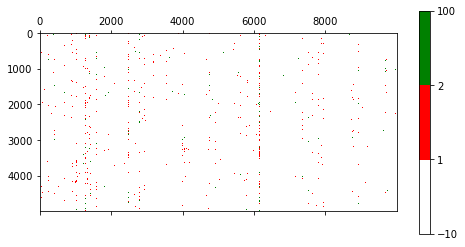

In [27]:
plot_matrix(sample)              

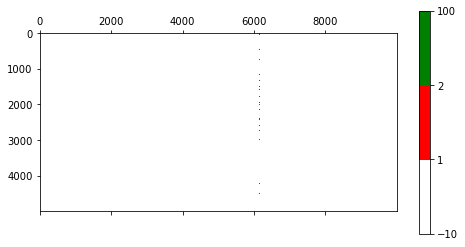

In [32]:
SVD = TruncatedSVD(n_components = 1)
A1 = SVD.fit_transform(sample)
plot_matrix(SVD.inverse_transform(A1))

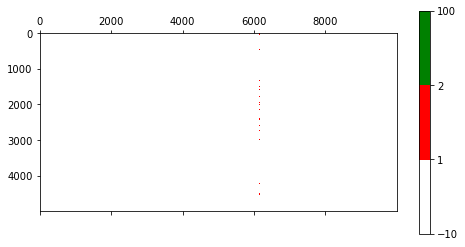

In [34]:
SVD = TruncatedSVD(n_components = 2)
A1 = SVD.fit_transform(sample)
plot_matrix(SVD.inverse_transform(A1))

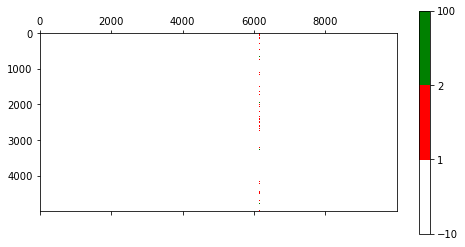

In [35]:
SVD = TruncatedSVD(n_components = 5)
A1 = SVD.fit_transform(sample)
plot_matrix(SVD.inverse_transform(A1))

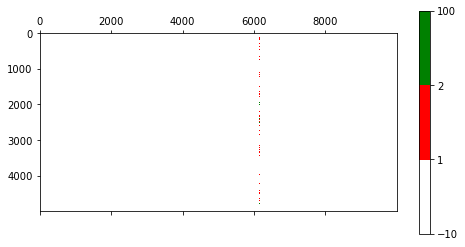

In [36]:
SVD = TruncatedSVD(n_components = 10)
A1 = SVD.fit_transform(sample)
plot_matrix(SVD.inverse_transform(A1))

In [79]:
U,Sigma1,VT = svd(sample)

In [80]:
#print(U[0:10],Sigma1[0:10],VT[0:10])
s = np.zeros((5000,5000))
Sigma = np.diag(Sigma1)
Sigma

array([[2.89905575e+02, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.19648832e+02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.13407589e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.46183419e-01, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 2.28042439e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 2.20320490e-01]])

In [81]:
#function that give truncated matrix of A with rank k by taking right and left singular vectors U,VT 
#highest k singular values are considered
def truncated_matrix(k,U,VT) :
    #Sigma[:k,:k]
    Ak = U[:,:k].dot(Sigma[:k,:k].dot(VT[:k,:]))
    return Ak,Sigma;

In [82]:
#function that calculates sum of all singular values and k highest singular values
#fk = ratio of sum of k highest singular values to sum of all singular values  
def calculation(Sigma,Ak,k):
    s=np.sum(Sigma)
    sk = np.sum(Sigma[:k,:k])
    fk = sk/s
    Ek = np.linalg.norm(sample-Ak) #frobenius norm of sample (5000x10000) and it's truncated matrix with k highest values
    return s,sk,fk,Ek;

In [83]:
# E,sk,f,s are the lists containing data of fk,sk,s,Ek for differenet values of k starting from k=0 to 4500
x = np.min([sample.shape[0], sample.shape[1]])
kx = np.arange(0,x,500) 
E = list()
sk = list()
f = list()
s = list()
 
for i in range(len(kx)): 
    (Ak,Sigmak)=truncated_matrix(kx[i],U,VT)  #truncated matrix for different values of k are obtained
    (a,b,c,d) = calculation(Sigmak,Ak,kx[i])  #Ek,fk,sk,s are calculated for different valules of k and stored in lists
    s.append(a)
    sk.append(b)
    f.append(c)
    E.append(d)

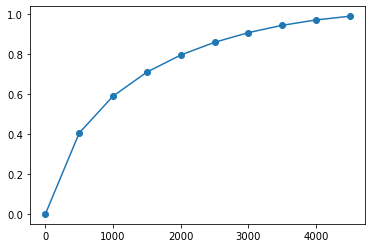

In [84]:
# plot fk vs k for (5000x10000)
plt.plot(kx,f,'o-')

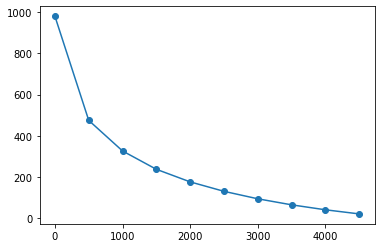

In [85]:
#plot ek vs k for (5000x10000)
plt.plot(kx,E,'o-')

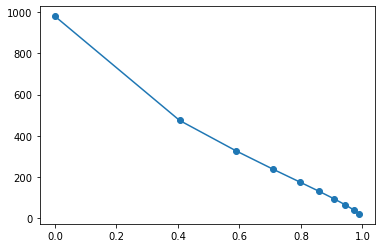

In [86]:
#plot Ek vs fk for (5000x10000)
plt.plot(f,E,'o-')

In [88]:
#row ids are taken into list for which semantical similar rows should be found 
row_id = np.array([818,1627,1659,2195,2916])
k1k = 1000
(A1k,Sigma1k)=truncated_matrix(k1k,U,VT);            #truncated matrix for k=1000 is obtained 
for i in range(len(row_id)):
    k = row_id[i]
#cosine distance is calculated for each row id with rows in the truncated matrix and stored in matrix val_out
    val_out = cdist(sample.iloc[k:k+1] ,A1k, 'cosine')  
#ind has tuples of indices for which the calculated cosine distance is less than 0.5
    ind = np.nonzero(val_out <= 0.5)
    print (list(ind) )                   #printing the list of indices 

[array([0], dtype=int64), array([818], dtype=int64)]
[array([0, 0, 0], dtype=int64), array([ 486, 1627, 2451], dtype=int64)]
[array([0], dtype=int64), array([1659], dtype=int64)]
[array([0, 0], dtype=int64), array([1699, 2195], dtype=int64)]
[array([0, 0, 0], dtype=int64), array([  72, 2916, 4452], dtype=int64)]


In [90]:
#similarly obtaining row id's from truncated matrix of sample (5000x10000) with highest 500 singular values as mentioned above
row_id = np.array([818,1627,1659,2195,2916])
k500 = 500
(A500,Sigma500)=truncated_matrix(k500,U,VT);
for i in range(len(row_id)):
    k = row_id[i]
    val_out = cdist(sample.iloc[k:k+1] ,A500, 'cosine')
    ind = np.nonzero(val_out <= 0.5)
    print (list(ind))

[array([0], dtype=int64), array([818], dtype=int64)]
[array([0, 0, 0, 0], dtype=int64), array([ 486, 1627, 2451, 4053], dtype=int64)]
[array([0], dtype=int64), array([1659], dtype=int64)]
[array([0, 0], dtype=int64), array([1699, 2195], dtype=int64)]
[array([0, 0, 0], dtype=int64), array([  72, 2916, 4452], dtype=int64)]


In [91]:
#similarly obtaining row id's from truncated matrix of sample (5000x10000)with highest 50 singular values as mentioned above
row_id = np.array([818,1627,1659,2195,2916])
k50 = 50
(A50,Sigma50)=truncated_matrix(k50,U,VT);
for i in range(len(row_id)):
    k = row_id[i]
    val_out = cdist(sample.iloc[k:k+1] ,A50, 'cosine')
    ind = np.nonzero(val_out <= 0.4)
    print (list(ind))

[array([], dtype=int64), array([], dtype=int64)]
[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64), array([  82, 1212, 1627, 2451, 3124, 3750, 4053, 4383, 4564, 4770],
      dtype=int64)]
[array([], dtype=int64), array([], dtype=int64)]
[array([0, 0, 0, 0], dtype=int64), array([ 672, 1699, 2195, 4181], dtype=int64)]
[array([0], dtype=int64), array([2916], dtype=int64)]
